/var/folders/1g/cy2cjgsj62gbzbptlspzs__c0000gn/T/ipykernel_8518/2016980698.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(d)  # Without social-only


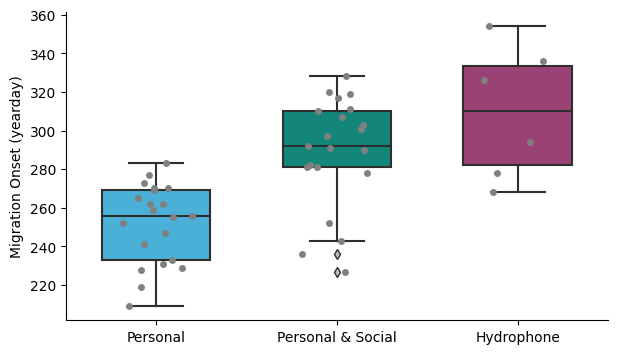

In [8]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

# CSV data
FEonly = np.loadtxt('summary_data/FE_a36_median_migDates.csv')
socialFE = np.loadtxt('summary_data/socialFE_a36_median_migDates.csv')
socialOnly = np.loadtxt('summary_data/social_a36_median_migDates.csv')

hydroData = np.array([268, 278, 294, 336, 326, 354])

N1 = len(FEonly)


# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Personal',N1), 'value': FEonly})
b = pd.DataFrame({ 'group' : np.repeat('Personal & Social',N1), 'value': socialFE })
d = pd.DataFrame({ 'group' : np.repeat('Hydrophone',len(hydroData)), 'value': hydroData})

df=a.append(b).append(d)  # Without social-only

myPalette = ['#33BBEE', '#009988','#AA3377']  # Without social-only

flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')


plt.figure(figsize=(7,4))
ax = sns.boxplot(x='group', y='value', data=df,width=0.6,palette=myPalette,flierprops=flierprops)


# add stripplot
ax = sns.stripplot(x='group', y='value', data=df, color="0.5", jitter=0.2, size=5)
ax.set(ylabel="Migration Onset (yearday)")
ax.set(xlabel="")
#sns.set_theme(style="ticks")
sns.despine(offset=0, trim=False)
plt.show()

fig = ax.get_figure()
fig.savefig("median_migration_dates_a36_hydrophone.eps") 





## Supplementary figure
Migration distributions with all migration strategies

/var/folders/1g/cy2cjgsj62gbzbptlspzs__c0000gn/T/ipykernel_1511/3981741592.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=doy.append(a).append(fe).append(b).append(c).append(d)
/var/folders/1g/cy2cjgsj62gbzbptlspzs__c0000gn/T/ipykernel_1511/3981741592.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=doy.append(a).append(fe).append(b).append(c).append(d)
/var/folders/1g/cy2cjgsj62gbzbptlspzs__c0000gn/T/ipykernel_1511/3981741592.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=doy.append(a).append(fe).append(b).append(c).append(d)
/var/folders/1g/cy2cjgsj62gbzbptlspzs__c0000gn/T/ipykernel_1511/3981741592.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

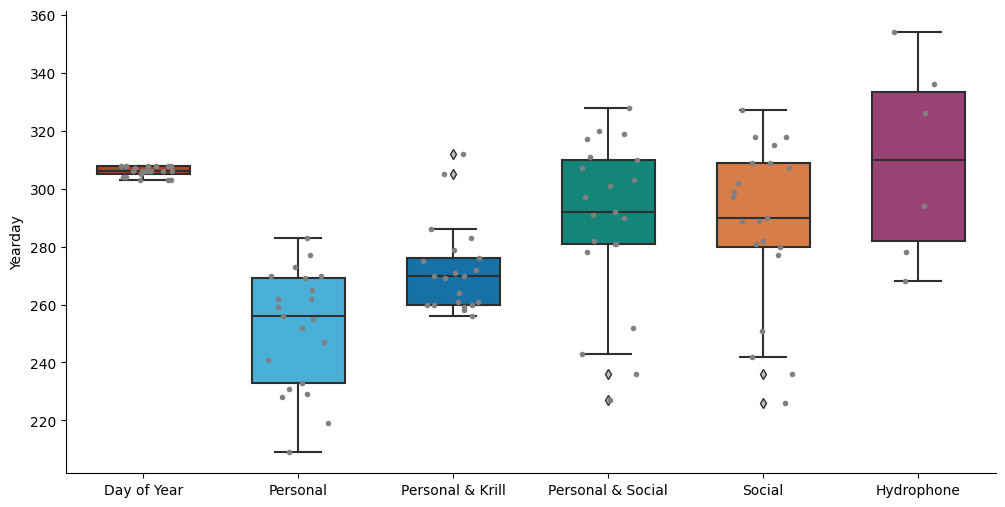

In [7]:
# CSV data
FEminKrill = np.loadtxt('summary_data/FEminKrill_a36_median_migDates.csv')
doyStats = np.loadtxt('summary_data/doy_a36_median_migDates.csv')


# Dataset:
fe = pd.DataFrame({ 'group' : np.repeat('Personal & Krill',N1), 'value': FEminKrill})
doy = pd.DataFrame({ 'group' : np.repeat('Day of Year',N1), 'value': doyStats})


# Order: day of year, personal, personal & krill, personal & social, social, hydrophone
df=doy.append(a).append(fe).append(b).append(c).append(d)

myPalette = ['#CC3311','#33BBEE', '#0077BB','#009988','#EE7733',  '#AA3377']

flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')


plt.figure(figsize=(12,6))
ax = sns.boxplot(x='group', y='value', data=df,width=0.6,palette=myPalette,flierprops=flierprops)


# add stripplot
ax = sns.stripplot(x='group', y='value', data=df, color="0.5", jitter=0.2, size=4)
ax.set(ylabel="Yearday")
ax.set(xlabel="")
sns.despine(offset=0, trim=False)

plt.show()

fig = ax.get_figure()
fig.savefig("median_migration_dates_a36_hydrophone_supplement.eps") 